# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

① 교차표(pd.crosstab())

In [6]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
feature='Gender'
print(pd.crosstab(data[target], data[feature]))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'columns'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'index'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'all'))

Gender     Female  Male
Attrition              
0             421   629
1              69   131
--------------------------------------------------
Gender       Female      Male
Attrition                    
0          0.859184  0.827632
1          0.140816  0.172368
--------------------------------------------------
Gender       Female      Male
Attrition                    
0          0.400952  0.599048
1          0.345000  0.655000
--------------------------------------------------
Gender     Female    Male
Attrition                
0          0.3368  0.5032
1          0.0552  0.1048


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
Gender                       
Female     0.859184  0.140816
Male       0.827632  0.172368


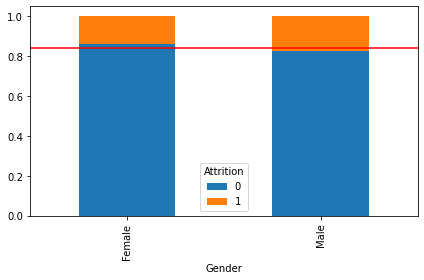

In [9]:
target='Attrition'
feature='Gender'
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

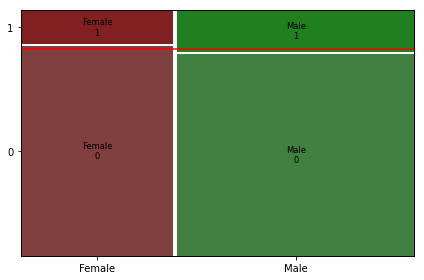

In [8]:
target='Attrition'
feature='Gender'
mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

별 차이가 없어 보인다.

③ 가설검정(카이제곱검정)

In [11]:
# 먼저 집계
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
Gender             
Female     421   69
Male       629  131
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
자유도 1
기대빈도
 [[411.6  78.4]
 [638.4 121.6]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> [약한 관계]

시각화에서 눈에 두드러지는 차이가 없었으며, 

chi-square 값은 1.98, p-value < .16으로 가설검정에서 유의하지 않았다.

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

In [12]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
feature='MaritalStatus'
print(pd.crosstab(data[target], data[feature]))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'columns'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'index'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'all'))

MaritalStatus  Divorced  Married  Single
Attrition                               
0                   253      501     296
1                    23       69     108
--------------------------------------------------
MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.916667  0.878947  0.732673
1              0.083333  0.121053  0.267327
--------------------------------------------------
MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.240952  0.477143  0.281905
1              0.115000  0.345000  0.540000
--------------------------------------------------
MaritalStatus  Divorced  Married  Single
Attrition                               
0                0.2024   0.4008  0.2368
1                0.0184   0.0552  0.0864


② 시각화( Stacked Bar, Mosaic)

Attrition             0         1
MaritalStatus                    
Divorced       0.916667  0.083333
Married        0.878947  0.121053
Single         0.732673  0.267327


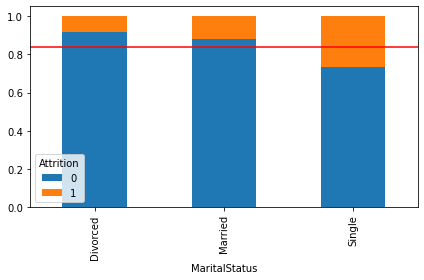

In [13]:
feature='MaritalStatus'
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

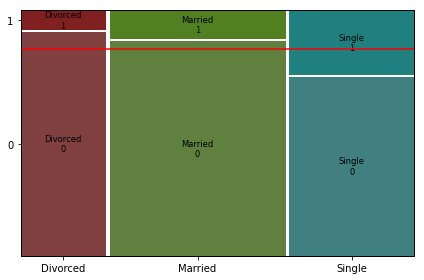

In [14]:
feature='MaritalStatus'
mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

결혼상태는 이직률과 관련이 있는 것으로 보인다.
- Single > Married > Divorced 순으로 이직률이 높다.

③ 가설검정(카이제곱검정)

In [15]:
feature='MaritalStatus'

# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition        0    1
MaritalStatus          
Divorced       253   23
Married        501   69
Single         296  108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
자유도 2
기대빈도
 [[231.84  44.16]
 [478.8   91.2 ]
 [339.36  64.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> [강한 관계]

시각화에서 결혼상태에 따라 차이가 보였으며,

chi-square > 53.13, p-value < .01으로 가설검정에서 유의하다.
- Single > Married > Divorced 순으로 이직률이 높다.
- 결혼 상태와 Age, DistanceFromHome, JobSatisfaction을 엮어서 비교해보면 어떨까?

#### 3) JobSatisfaction --> Attrtion

In [16]:
feature='JobSatisfaction'

① 교차표(pd.crosstab())

In [17]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
feature='JobSatisfaction'
print(pd.crosstab(data[target], data[feature]))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'columns'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'index'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'all'))

JobSatisfaction    1    2    3    4
Attrition                          
0                197  196  308  349
1                 53   39   60   48
--------------------------------------------------
JobSatisfaction      1         2         3         4
Attrition                                           
0                0.788  0.834043  0.836957  0.879093
1                0.212  0.165957  0.163043  0.120907
--------------------------------------------------
JobSatisfaction         1         2         3         4
Attrition                                              
0                0.187619  0.186667  0.293333  0.332381
1                0.265000  0.195000  0.300000  0.240000
--------------------------------------------------
JobSatisfaction       1       2       3       4
Attrition                                      
0                0.1576  0.1568  0.2464  0.2792
1                0.0424  0.0312  0.0480  0.0384


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


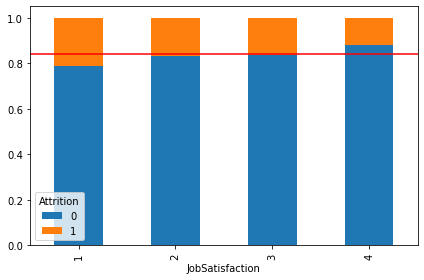

In [18]:
feature='JobSatisfaction'
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

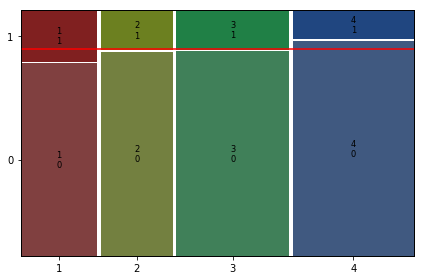

In [19]:
feature='JobSatisfaction'
mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

직무만족도와 이직률은 관계가 있어보인다.
- 직무만족도가 높을 수록 이직률이 낮다. (음의 관계)

③ 가설검정(카이제곱검정)

In [20]:
feature='JobSatisfaction'

# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition          0   1
JobSatisfaction         
1                197  53
2                196  39
3                308  60
4                349  48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
자유도 3
기대빈도
 [[210.    40.  ]
 [197.4   37.6 ]
 [309.12  58.88]
 [333.48  63.52]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> [중간 관계] -> 그러나 그룹 2, 3을 합쳐서 보면 다를 지도..(분석3)

시각화에서 직무만족도에 따라 차이가 보였으며,

chi-square > 9.63, p-value < .05으로 가설검정에서 유의하다.
- 직무만족도가 높을 수록 이직률이 낮다.
- 직무만족도 2, 3인 사람들은 어떤 부분에서 이직률에 차이가 나는지 확인해보면 좋을 듯 하다.

#### 4) 추가 --> Attrtion (WorkLifeBalance --> Attrition)

In [ ]:
feature='WorkLifeBalance'

① 교차표(pd.crosstab())

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
feature='WorkLifeBalance'
print(pd.crosstab(data[target], data[feature]))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'columns'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'index'))
print('-'*50)
print(pd.crosstab(data[target], data[feature], normalize = 'all'))

② 시각화( Stacked Bar, Mosaic)

In [57]:
feature='WorkLifeBalance'
def qualitative_visual(data, feature, target):
    print('target: ', target, '\nfeature: ', feature)
    temp = pd.crosstab(data[feature], data[target], normalize = 'index')
    print(temp)

    temp.plot.bar(stacked=True)
    plt.axhline(1-data[target].mean(), color = 'r')
    plt.tight_layout()
    plt.show()
    mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
    plt.axhline(1- data[target].mean(), color = 'r')
    plt.tight_layout()
    plt.show()

Attrition               0         1
WorkLifeBalance                    
1                0.710145  0.289855
2                0.845118  0.154882
3                0.855422  0.144578
4                0.810219  0.189781


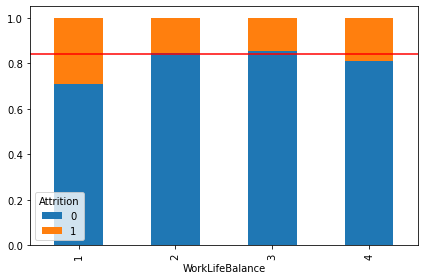

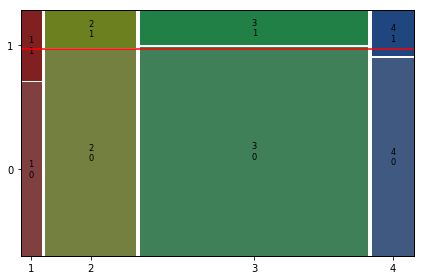

In [53]:
qualitative_visual(data, feature, target)

시각화를 통해 파악한 내용을 적어 봅시다.

WLB이 1일 경우에는 이직률이 높은 것 같지만 다른 경우에는 크게 차이가 없어보인다.

③ 가설검정(카이제곱검정)

In [56]:
feature='WorkLifeBalance'

def qualitative_test(data, feature, target):
    print('target: ', target, '\nfeature: ', feature)
    # 먼저 집계
    table = pd.crosstab(data[feature], data[target])
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    print('기대빈도\n',result[3])

In [55]:
qualitative_test(data, feature, target)

교차표
 Attrition          0   1
JobSatisfaction         
1                197  53
2                196  39
3                308  60
4                349  48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
자유도 3
기대빈도
 [[210.    40.  ]
 [197.4   37.6 ]
 [309.12  58.88]
 [333.48  63.52]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

가설 검정 결과에서 p < .05로 유의하게 나타나며, WLB이 1이 경우 이직률이 높기때문으로 보인다.

#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [21]:
feature='Age'

① 그래프 : histogram, densityplot

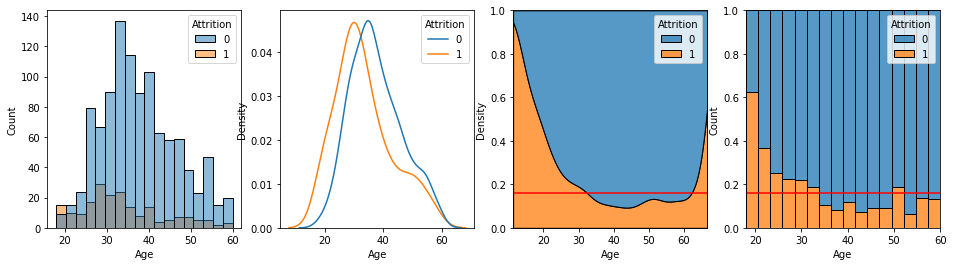

In [22]:
feature='Age'
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
sns.histplot(x=feature, data = data, hue = target)

plt.subplot(1, 4, 2)
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False)

plt.subplot(1, 4, 3)
sns.kdeplot(x=feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.subplot(1, 4, 4)
sns.histplot(x=feature, data = data, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 나이와 이직률이 관계있는 것처럼 보인다.
> - 나이가 적을 수록 이직률이 높다.

② 수치화 : 로지스틱회귀

In [32]:
feature='Age'
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
temp = data.loc[data[feature].notnull()]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.summary())
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1249
Method:                           MLE   Df Model:                            0
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                 0.03414
Time:                        10:04:27   Log-Likelihood:                -530.83
converged:                       True   LL-Null:                       -549.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0471      0.002    -21.234      0.000      -0.051      -0.043
Age    4.667821e-100
dtype: f

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> [강한 관계]

> 시각화에서 나이는 이직률과 관련있는 것으로 보이며,
>
> 로직스틱 회귀에서 p-value < .01으로 유의하게 나타난다.
>
> - 나이가 어릴 수록 이직률이 높다.
> - 나이와 결혼상태를 함께 확인하면 좋을 것 같다.

#### 2) DistanceFromHome --> Attrtion


① 그래프 : histogram, densityplot

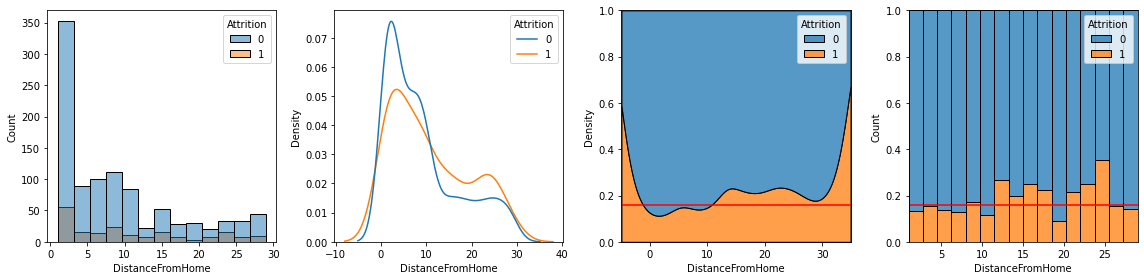

In [33]:
feature='DistanceFromHome'
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
sns.histplot(x=feature, data = data, hue = target)

plt.subplot(1, 4, 2)
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False)

plt.subplot(1, 4, 3)
sns.kdeplot(x=feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.subplot(1, 4, 4)
sns.histplot(x=feature, data = data, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 회사-집 거리는 이직률과 관련이 있는 것처럼 보인다.

> - 회사-집 거리가 멀 수록 이직률이 높다.

② 수치화 : 로지스틱회귀

In [26]:
feature='DistanceFromHome'
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
temp = data.loc[data[feature].notnull()]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> [강한 관계]

> 시각화에서 집-회사 거리는 이직률과 관련있는 것으로 보이며,
>
> 로직스틱 회귀에서 p-value < .01으로 유의하게 나타난다.
>
> - 집-회사 거리가 멀 수록 이직률이 높다.

#### 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

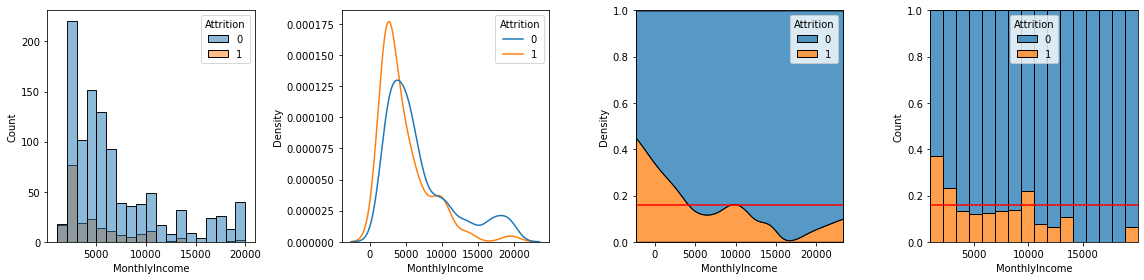

In [34]:
feature='MonthlyIncome'
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
sns.histplot(x=feature, data = data, hue = target)

plt.subplot(1, 4, 2)
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False)

plt.subplot(1, 4, 3)
sns.kdeplot(x=feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.subplot(1, 4, 4)
sns.histplot(x=feature, data = data, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 월급과 이직률은 관계있는 것처럼 보인다.

> - 급여가 낮을 수록 이직률이 높다.

> 

② 수치화 : 로지스틱회귀

In [29]:
feature='MonthlyIncome'
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
temp = data.loc[data[feature].notnull()]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> [강한 관계]

> 시각화에서 급여는 이직률과 관련있는 것으로 보이며,
>
> 로직스틱 회귀에서 p-value < .01으로 유의하게 나타난다.
>
> - 급여가 낮을 수록 이직률이 높다.
>   - 급여가 낮을 수록 나이가 낮거나 결혼을 하지 않았다거나 하는 feature들이 있지 않을까? (분석2)

#### 4) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

## 4.관계 정리

### 1) 강한관계의 변수

MaritalStatus, Age, DistanceFromHome, MonthlyIncome

### 2) 중간관계의 변수

JobSatisfaction

### 3) (거의)관계 없음

Gender

## 5. 추가 분석

### 1) 분석1

In [36]:
MaritalStatus_int = {'Single': 0, 'Married': 1, 'Divorced': 2}
data['MaritalStatus_int'] = data['MaritalStatus'].map(MaritalStatus_int)

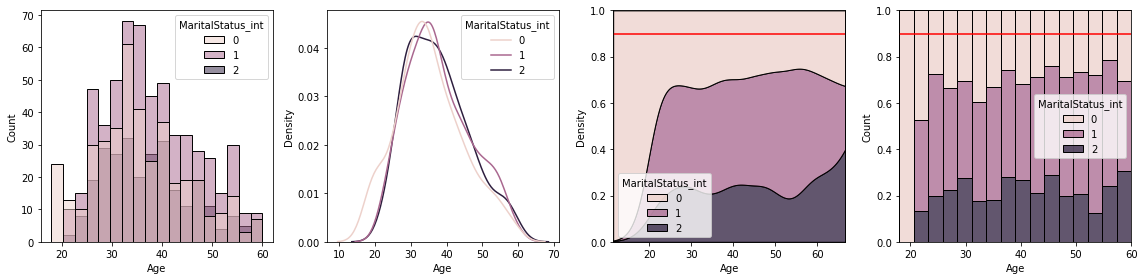

In [40]:
feature='Age'
target='MaritalStatus_int'
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
sns.histplot(x=feature, data = data, hue = target)

plt.subplot(1, 4, 2)
sns.kdeplot(x=feature, data = data, hue = target, common_norm = False)

plt.subplot(1, 4, 3)
sns.kdeplot(x=feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.subplot(1, 4, 4)
sns.histplot(x=feature, data = data, bins = 16
             , hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()
target='Attrition'

### 2) 분석2

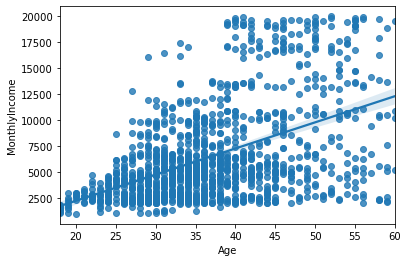

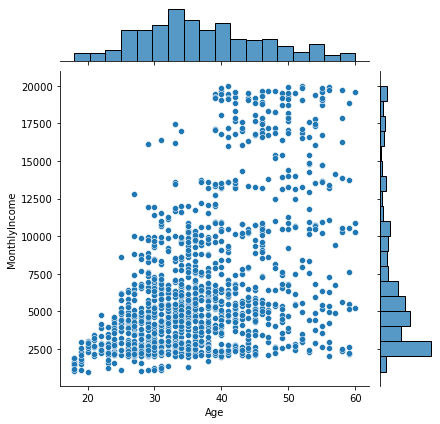

In [41]:
target='MonthlyIncome'
feature='Age'
sns.regplot(x=feature, y=target, data = data)
sns.jointplot(x=feature, y=target, data = data)
target='Attrition'

In [42]:
# 상관계수와 p-value 
target='MonthlyIncome'
feature='Age'
r, p = spst.pearsonr(data[feature], data[target])
target='Attrition'
print('r: ', r, '\np:', p)

r:  0.4898221856603889 
p: 2.0737738056936646e-76



> 나이와 월급은 관련이 있는 것으로 보인다.
> 1. 어릴 수록 이직률이 높은 것
> 2. 월급이 적을 수록 이직률이 높은 것
>
> 두 개는 서로 영향을 줄 것 같다.

### 3) 분석3

https://brunch.co.kr/@jongbo/31
> 중간 편향: 중간을 선택하려는 심리..

In [43]:
JobSatisfaction2 = {1: 0, 2: 1, 3: 1, 4: 2}
data['JobSatisfaction2'] = data['JobSatisfaction'].map(JobSatisfaction2)

Attrition                0         1
JobSatisfaction2                    
0                 0.788000  0.212000
1                 0.835821  0.164179
2                 0.879093  0.120907


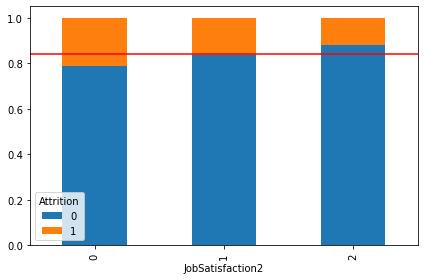

In [44]:
feature='JobSatisfaction2'
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

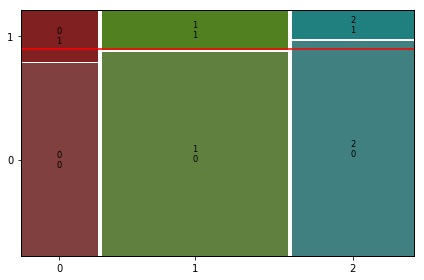

In [46]:
feature='JobSatisfaction2'
mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

In [47]:
feature='JobSatisfaction2'

# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition           0   1
JobSatisfaction2         
0                 197  53
1                 504  99
2                 349  48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.62245380689213
p-value 0.008137869190485921
자유도 2
기대빈도
 [[210.    40.  ]
 [506.52  96.48]
 [333.48  63.52]]


> [강한 관계]

시각화에서 직무만족도에 따라 차이가 보였으며,

chi-square > 9.63, p-value < .01으로 가설검정에서 유의하다.
- Jobsatisfaction과 비교하여 조금 더 뚜렷해보임.

In [48]:
JobSatisfaction3 = {1: 0, 2: 0, 3: 1, 4: 1}
data['JobSatisfaction3'] = data['JobSatisfaction'].map(JobSatisfaction3)

Attrition                0         1
JobSatisfaction3                    
0                 0.810309  0.189691
1                 0.858824  0.141176


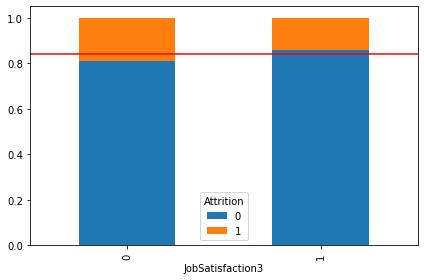

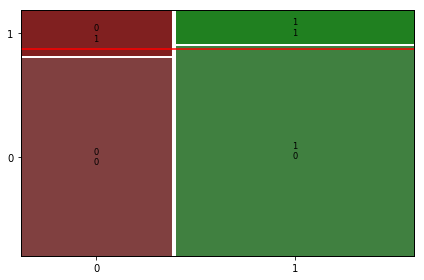

In [49]:
feature='JobSatisfaction3'
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()
mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

In [50]:
feature='JobSatisfaction3'

# 먼저 집계
table = pd.crosstab(data[feature], data[target])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition           0    1
JobSatisfaction3          
0                 393   92
1                 657  108
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.843253166100347
p-value 0.027754489767235622
자유도 1
기대빈도
 [[407.4  77.6]
 [642.6 122.4]]


### 4) 분석4

In [ ]:
MaritalStatus2 = {'Single': 0, 'Married': 1, 'Divorced': 2}
data['MaritalStatus2'] = data['MaritalStatus'].map(MaritalStatus2)

In [60]:
WorkLifeBalance2 = {1: 1, 2: 1, 3: 2, 4: 2}
data['WorkLifeBalance2'] = data['WorkLifeBalance'].map(JobSatisfaction2)

Attrition               0         1
WorkLifeBalance                    
1                0.521739  0.478261
2                0.726316  0.273684
3                0.762295  0.237705
4                0.690476  0.309524


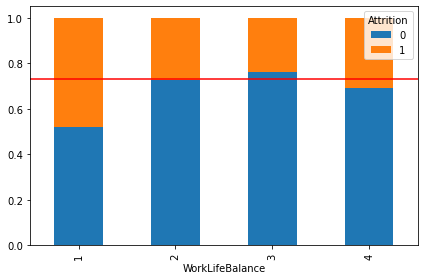

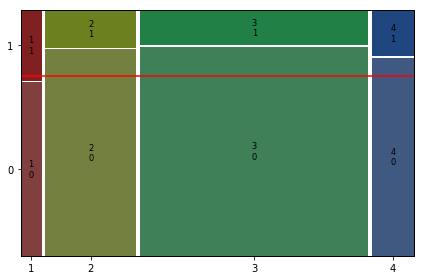

In [65]:
data2 = data.copy()[data['MaritalStatus']=='Single']
feature='WorkLifeBalance'
temp = pd.crosstab(data2[feature], data2[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

Attrition               0         1
WorkLifeBalance                    
1                0.805556  0.194444
2                0.899225  0.100775
3                0.890533  0.109467
4                0.820896  0.179104


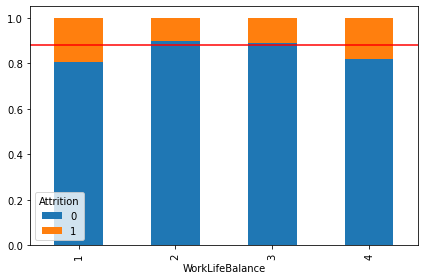

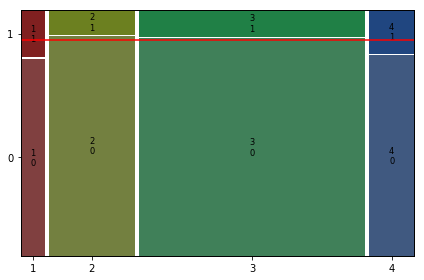

In [67]:
data2 = data.copy()[data['MaritalStatus']=='Married']
feature='WorkLifeBalance'
temp = pd.crosstab(data2[feature], data2[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

mosaic(data2.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

Attrition               0         1
WorkLifeBalance                    
1                0.800000  0.200000
2                0.904110  0.095890
3                0.921212  0.078788
4                0.964286  0.035714


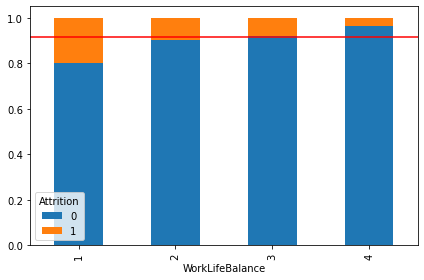

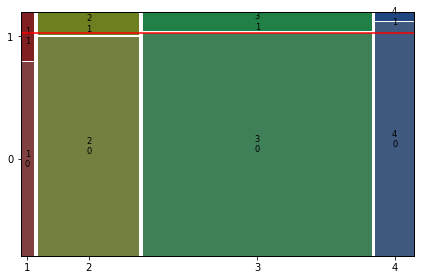

In [68]:
data2 = data.copy()[data['MaritalStatus']=='Divorced']
feature='WorkLifeBalance'
temp = pd.crosstab(data2[feature], data2[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

mosaic(data2.sort_values([feature, target]), [feature, target], gap = 0.01)
plt.axhline(1- data2[target].mean(), color = 'r')
plt.tight_layout()
plt.show()

> Divorced 상태에서 WLB에 따른 이직률이 차이난다